In [4]:
#SLR
#importing Library
! pip install statsmodels

In [5]:
# Step 1: Import necessary libraries
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
# Step 3: Creating a Linear Regression Model
# Step 4: Training the model using data set
# Step 5: Get the values of slope and intercept from the trained model
# Step 6: Display the equation of the line
# Step 7: Predit values using the model
# Step 8: Plot the regression line
#step 9: Prediction Features

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression

In [7]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)

np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)

true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values
 

In [8]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [9]:
#step3: create a  LinearRegression model
model=LinearRegression()

In [10]:
# step 4: train the model 
model.fit(X,Y)

LinearRegression()

In [11]:
# step 5: get the values of slope(m) and intercept(c) from the trained model
Model_Coef=model.coef_[0]
Model_Intercept=model.intercept_
print("model coefficent:",Model_Coef)#coefficient is as same as the slope in simple linearRegression
print("Model Intercept:",Model_Intercept)

model coefficent: 4.965498141580592
Model Intercept: 27.430065779800533


In [12]:
# step 6: display the equation of the line 
print(f'Equation of the line :Y={Model_Coef:.2f}X+{Model_Intercept:.2f}')

Equation of the line :Y=4.97X+27.43


In [14]:
#step 7: predict Values using the model
y_pred=model.predict(X)

In [15]:
#Model Evolution metrics


# step 1: meansqaured error(mse)
mse=mean_squared_error(Y,y_pred)
print(f"Mean Squared Error:{mse:.2f}")

Mean Squared Error:11.75


In [16]:
#mean absolute error(mae)
mae=mean_absolute_error(Y,y_pred)
print(f"Mean Absolute Error:{mae:.2f}")

Mean Absolute Error:2.87


In [17]:
rmse = np.sqrt(mse)
print(f"Root Mean square Error:{rmse:.2f}")

Root Mean square Error:3.43


In [18]:
#R² (R-Squared) -represnts how well the model fits the data (0 to 1,where 1 is best)

r2=r2_score(Y,y_pred)
print(f"R²(R-squared): {r2:.3f}")

R²(R-squared): 0.945


In [19]:
#Adjusted R² for the numder of predictors,better for multiple regression 
n=len(Y)#NUMBER of observations
p=1 #number of independent variable (Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared:{adj_r2:.2f}")

Adjusted R-squared:0.94


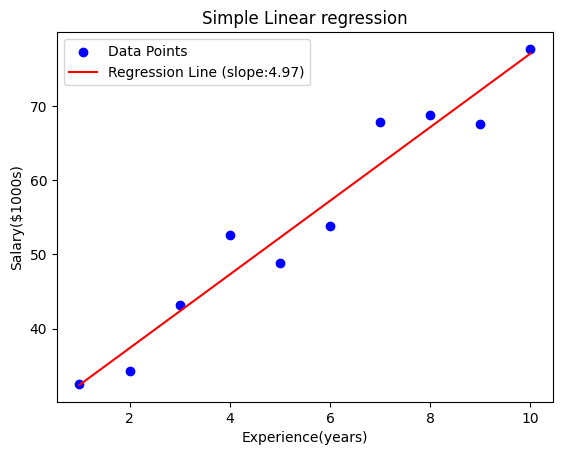

In [20]:
#step 8: plot actual datapoints best fit line
scatter = plt.scatter(X,Y,color='blue',label='Data Points')
slope_of_best_fit = plt.plot(X,y_pred,color='red',label=f'Regression Line (slope:{model.coef_[0]:.2f})')
plt.title('Simple Linear regression')
plt.xlabel("Experience(years)")
plt.ylabel("Salary($1000s)")
plt.legend()
plt.show(slope_of_best_fit)

In [ ]:
import numpy as np

while True:
    try:
        exp = input("\n Enter years of experience to predict salary (or -1 to exit): ")
        
        if exp.strip() == "-1":  # Exit condition
            print("Exiting program. Goodbye!")
            break

        exp = float(exp)  # Convert to float
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience is ${predicted_salary:.2f}K")

    except ValueError:
        print("Invalid input. Please enter a number.")
        
    except KeyboardInterrupt:
        print("\nProgram interrupted by user. Exiting gracefully...")
        break


Invalid input. Please enter a number.


In [23]:
 
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
import statsmodels.api as sm  # For OLS Regression

In [25]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(X)  # Transforming X to polynomial features # Display detailed statistical summary
 

In [26]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression

X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression

ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model

print("\nOLS Regression Summary:\n")

print(ols_model.summary()) 


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:12:44   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

c:\Users\cvr\Desktop\22B81A66C1\21-02-2025\vnv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
